# **Bank Telemarketing Predictive Analytics**

## **1. Project Domain**  

Marketing campaigns play a crucial role in driving business growth, particularly in the financial industry. Within the context of telemarketing, which involves contacting customers remotely through channels such as telephone calls, organizations have widely adopted this approach. However, outbound telemarketing often faces challenges, such as high costs and intrusiveness, which can negatively impact customer relationships [[1]](https://repositorium.sdum.uminho.pt/bitstream/1822/30994/1/dss-v3.pdf). Each call incurs an estimated cost of €5 [[2]](https://www.maestroqa.com/blog/call-center-cost-per-call), making it essential to optimize targeting strategies to ensure that only customers with the highest likelihood of success are contacted. Furthermore, considering a minimum deposit requirement of €5,000 [[3]](https://www.bancomontepio.pt/en/individuals/savings-and-retirement/term-deposits) and an average Net Interest Margin (NIM) of 1.25% in Portugal [[4]](https://www.theglobaleconomy.com/Portugal/net_interest_margin/), successful calls represent significant revenue opportunities, generating an estimated net revenue of €62.50 per deposit annually.

The project proposes a machine learning-driven solution to enhance the effectiveness of telemarketing campaigns by predicting the likelihood of a successful long-term deposit subscription. By leveraging machine learning models, the system aims to analyze customer data and prioritize individuals with higher conversion probabilities, thereby reducing campaign costs and improving efficiency. Such an approach enables banks to focus resources on high-potential leads, minimizing unnecessary calls while maximizing revenue opportunities and maintaining better customer relationships.

## **2. Business Understanding**

### **2.1. Problem Statements**

1. **High Costs and Inefficiency:** Outbound telemarketing incurs significant costs (€5 per call) and inefficiency due to a lack of accurate targeting, leading to wasted resources and potential customer dissatisfaction.  
2. **Maximizing Revenue Opportunities:** The need to identify high-potential customers to maximize revenue from long-term deposits (€62.50 per successful deposit annually) remains unaddressed.  


### **2.2. Goals**

1. **Optimize Telemarketing Costs:** Reduce the number of unnecessary calls by accurately predicting the likelihood of success for each customer.  
2. **Increase Revenue Efficiency:** Improve the overall return on investment by prioritizing calls to high-potential customers, ensuring higher conversion rates.

### **2.3. Solution Statements**

1. **Machine Learning Model Development:** Implement and compare machine learning algorithms, such as Logistic Regression, KNN, Naive Bayes, Decision Tree, and Ensemble Methods, to predict customer conversion probabilities.  
2. **Hyperparameter Tuning:** Enhance the performance of the chosen baseline model through systematic hyperparameter optimization.  
3. **Evaluation Metrics:** Use **recall** to ensure high identification of potential customers and calculate business metrics (e.g., cost savings and revenue gains) to assess the economic impact of the solution.
4. **Feature Importance Analysis:** Perform feature importance analysis to identify the most impactful factors influencing customer conversions, enabling more informed decision-making.  


## **3. Data Understanding**

### **3.1. Dataset**

The project utilizes the [**Bank Marketing Campaigns Dataset** [5]](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset), which records the outcomes of marketing campaigns conducted by a bank in Portugal. The campaigns primarily involved direct phone calls to clients, promoting term deposit subscriptions. The target variable, **`y`**, indicates whether a client subscribed to a term deposit ("yes" or "no"). The dataset comprises 41,176 observations and 21 features, categorized based on their relevance. Some categorical features contain missing values, represented as "unknown." These can be addressed through appropriate imputation techniques or treated as a separate class if deemed relevant to the analysis.

1. **Bank Client Data**
   - **`age`**: Age of the client (numeric).
   - **`job`**: Type of job (categorical: e.g., "admin.", "blue-collar", "entrepreneur", "unknown").
   - **`marital`**: Marital status (categorical: e.g., "single", "married", "divorced", "unknown").
   - **`education`**: Education level (categorical: e.g., "university.degree", "high.school", "unknown").
   - **`default`**: Credit default status (categorical: "yes", "no", "unknown").
   - **`housing`**: Housing loan status (categorical: "yes", "no", "unknown").
   - **`loan`**: Personal loan status (categorical: "yes", "no", "unknown").

2. **Last Contact Data**
   - **`contact`**: Communication type (categorical: "cellular", "telephone").
   - **`month`**: Last contact month (categorical: e.g., "jan", "feb", "dec").
   - **`day_of_week`**: Last contact day (categorical: "mon", "tue", "fri").
   - **`duration`**: Last contact duration in seconds (numeric). (Note: For realistic predictive models, this feature is excluded as it’s only known after the call.)

3. **Campaign Data**
   - **`campaign`**: Number of contacts made during the campaign (numeric).
   - **`pdays`**: Days since last client contact in a previous campaign (numeric; 999 indicates no prior contact).
   - **`previous`**: Number of contacts before the current campaign (numeric).
   - **`poutcome`**: Outcome of the previous campaign (categorical: "success", "failure", "nonexistent").

4. **Social and Economic Context**
   - **`emp.var.rate`**: Employment variation rate (numeric).
   - **`cons.price.idx`**: Consumer price index (numeric).
   - **`cons.conf.idx`**: Consumer confidence index (numeric).
   - **`euribor3m`**: Euribor 3-month rate (numeric).
   - **`nr.employed`**: Number of employees (numeric).

5. **Target**
   - **`y`**: Whether the client subscribed to a term deposit (binary: "yes", "no").

### **3.2. Import Libraries**


In [1]:
# Data manipulation.
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

# Data preparation and evaluation.
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import recall_score, confusion_matrix

# Models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Hide warning.
import warnings
warnings.filterwarnings('ignore')


### **3.3. Load Datasets**


In [2]:
# Download the Bank Marketing Campaign dataset from Kaggle.
!kaggle datasets download -d volodymyrgavrysh/bank-marketing-campaigns-dataset

# Extract the contents of the bank-marketing-campaigns-dataset.zip file.
!unzip bank-marketing-campaigns-dataset.zip

# Remove the bank-marketing-campaigns-dataset.zip file.
!rm bank-marketing-campaigns-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset
License(s): CC-BY-NC-SA-4.0
100% 391k/391k [00:00<00:00, 1.03MB/s]
100% 391k/391k [00:00<00:00, 1.03MB/s]
Archive:  bank-marketing-campaigns-dataset.zip
  inflating: bank-additional-full.csv  


In [3]:
# Load the Bank Marketing Campaign dataset into  DataFrames.
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Preprocessed target column.
df = df.rename(columns={'y': 'deposit'})
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Drop 'duration' column.
df = df.drop('duration', axis=1)
df.duplicated().sum()


1784

The dataset was preprocessed by renaming the 'y' column to 'deposit' and converting its values from categorical ('yes', 'no') to numerical (1, 0). The 'duration' feature, which represents the last contact duration in seconds, was removed as it is only known after the call and could introduce data leakage, making it unsuitable for realistic predictive models. Additionally, duplicate rows will be removed.

In [5]:
df = df.drop_duplicates()

### **3.4. Exploratory Data Analysis**  

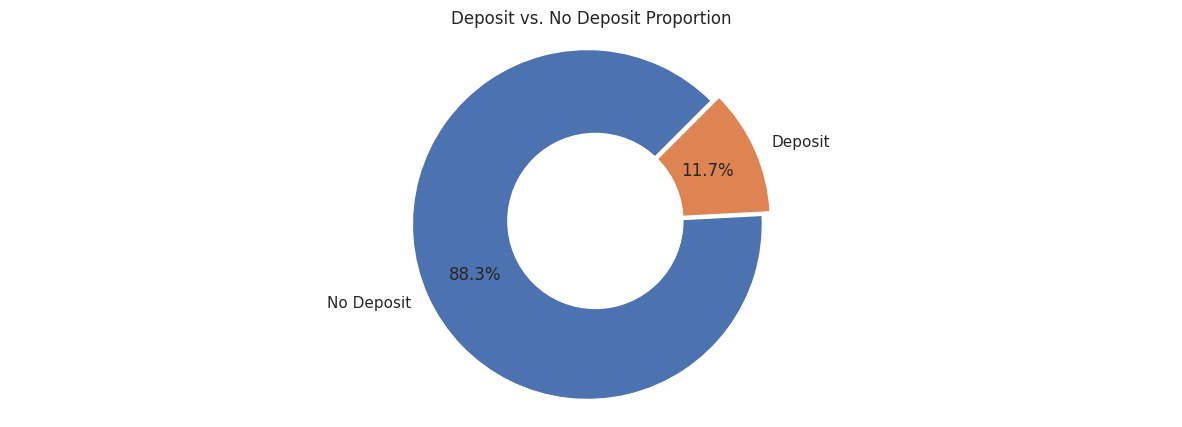

In [6]:
# Calculate deposit proportion.
deposit_counts = df['deposit'].value_counts()

# Parameters for pie chart.
labels = ['No Deposit', 'Deposit']
sizes = [deposit_counts[0], deposit_counts[1]]
explode = (0.05, 0)

# Plot deposit proportion.
plt.figure(figsize=(15, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45, pctdistance=0.7, explode=explode)
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Deposit vs. No Deposit Proportion')
plt.axis('equal')
plt.show()


The visualization reveals a significant imbalance in the dataset, with 36,536 (88.3%) of clients not making a deposit, compared to only 4,640 (11.7%) who did. This suggests that the majority of clients in the dataset did not engage in the desired action, which may influence model training, potentially leading to a bias towards predicting 'no deposit.' This distribution should be considered when building and evaluating predictive models to account for the class imbalance. Further, exploratory data analysis will be performed to numerical and categorical features.

#### **3.4.1. Numerical Features**

In [7]:
def analyze_numerical(df):
    """
    Analyzes numerical features.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - None. Displays the first few rows of the DataFrame and a summary table.
    """

    # Filter numerical features
    df = df[df.select_dtypes(include=np.number).columns]

    # Initialize a dictionary to store summary statistics for each feature.
    summary_data = {
        'Feature': df.columns.values,
        'Type': df.dtypes.values,
        'Null': df.isna().sum().values,
        'Min': pd.Series(dtype='object'),
        'Q1': pd.Series(dtype='object'),
        'Median': pd.Series(dtype='object'),
        'Q3': pd.Series(dtype='object'),
        'Max': pd.Series(dtype='object')
    }

    # Create a DataFrame from the summary data.
    summary = pd.DataFrame(summary_data, index=range(len(df.columns)))

    # Calculate and populate min/max values for numeric features.
    for col in df.columns:
        summary.loc[summary['Feature'] == col, 'Min'] = df[col].min()
        summary.loc[summary['Feature'] == col, 'Q1'] = df[col].quantile(0.25)
        summary.loc[summary['Feature'] == col, 'Median'] = df[col].median()
        summary.loc[summary['Feature'] == col, 'Q3'] = df[col].quantile(0.75)
        summary.loc[summary['Feature'] == col, 'Max'] = df[col].max()

    # Display the first few rows of the DataFrame and the summary table.
    display(
        df[:1],
        df.shape,
        summary
    )


In [8]:
analyze_numerical(df)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


(39404, 10)

,Feature,Type,Null,Min,Q1,Median,Q3,Max
0,age,int64,0,17,32.0,38.0,47.0,98
1,campaign,int64,0,1,1.0,2.0,3.0,56
2,pdays,int64,0,0,999.0,999.0,999.0,999
3,previous,int64,0,0,0.0,0.0,0.0,7
4,emp.var.rate,float64,0,-3.4,-1.8,1.1,1.4,1.4
5,cons.price.idx,float64,0,92.201,93.075,93.798,93.994,94.767
6,cons.conf.idx,float64,0,-50.8,-42.7,-41.8,-36.4,-26.9
7,euribor3m,float64,0,0.634,1.334,4.857,4.961,5.045
8,nr.employed,float64,0,4963.6,5099.1,5191.0,5228.1,5228.1
9,deposit,int64,0,0,0.0,0.0,0.0,1


The dataset contains some numerical features with null values. In the 'pdays' feature, which represents the number of days since the client was last contacted during a previous campaign, the minimum value is zero, while the Q1, median, Q3, and maximum are all 999. This suggests that most clients were not previously contacted. This observation aligns with the 'previous' feature, which indicates the number of contacts made before this campaign, where the maximum value is 7, but the minimum, Q1, median, and Q3 values are all zero. We will further investigate the 'pdays' and 'previous' features to better understand the data. Additionally, we will examine the 'campaign' feature, which represents the number of contacts made during this campaign, as there is a significant jump between Q3 (3 contacts) and the maximum (56 contacts), indicating potential anomalies or outliers.

In [9]:
(df['pdays'].value_counts(normalize=True).head() * 100).round(2)

,proportion
pdays,
999,96.16
3,1.11
6,1.05
4,0.30
9,0.16


The proportion of values in the 'pdays' feature indicates that 96.16% of the entries are 999, suggesting that most clients were not contacted in previous campaigns. Given that 'pdays' represents the number of days since the last contact, and the value 999 is used when a client has never been contacted, there is no appropriate method to fill in these values for clients who were never contacted. Therefore, the 'pdays' feature will be dropped from the dataset. Additionally, duplicate rows will be identified and removed.

In [10]:
df = df.drop('pdays', axis=1)
df.duplicated().sum()

11

In [11]:
df = df.drop_duplicates()

In [12]:
(df['previous'].value_counts(normalize=True).head() * 100).round(2)

,proportion
previous,
0,85.95
1,11.37
2,1.90
3,0.54
4,0.18


The 'previous' feature shows that 85.95% of the entries are 0, indicating that the majority of clients were never contacted in previous campaigns. Other values represent a small proportion of the data, reflecting clients who were contacted once or more. Given that the value 0 is valid for clients who were not previously contacted, and dropping this feature may result in the loss of valuable information about clients' interaction history with previous campaigns, the 'previous' feature will be retained in the dataset.

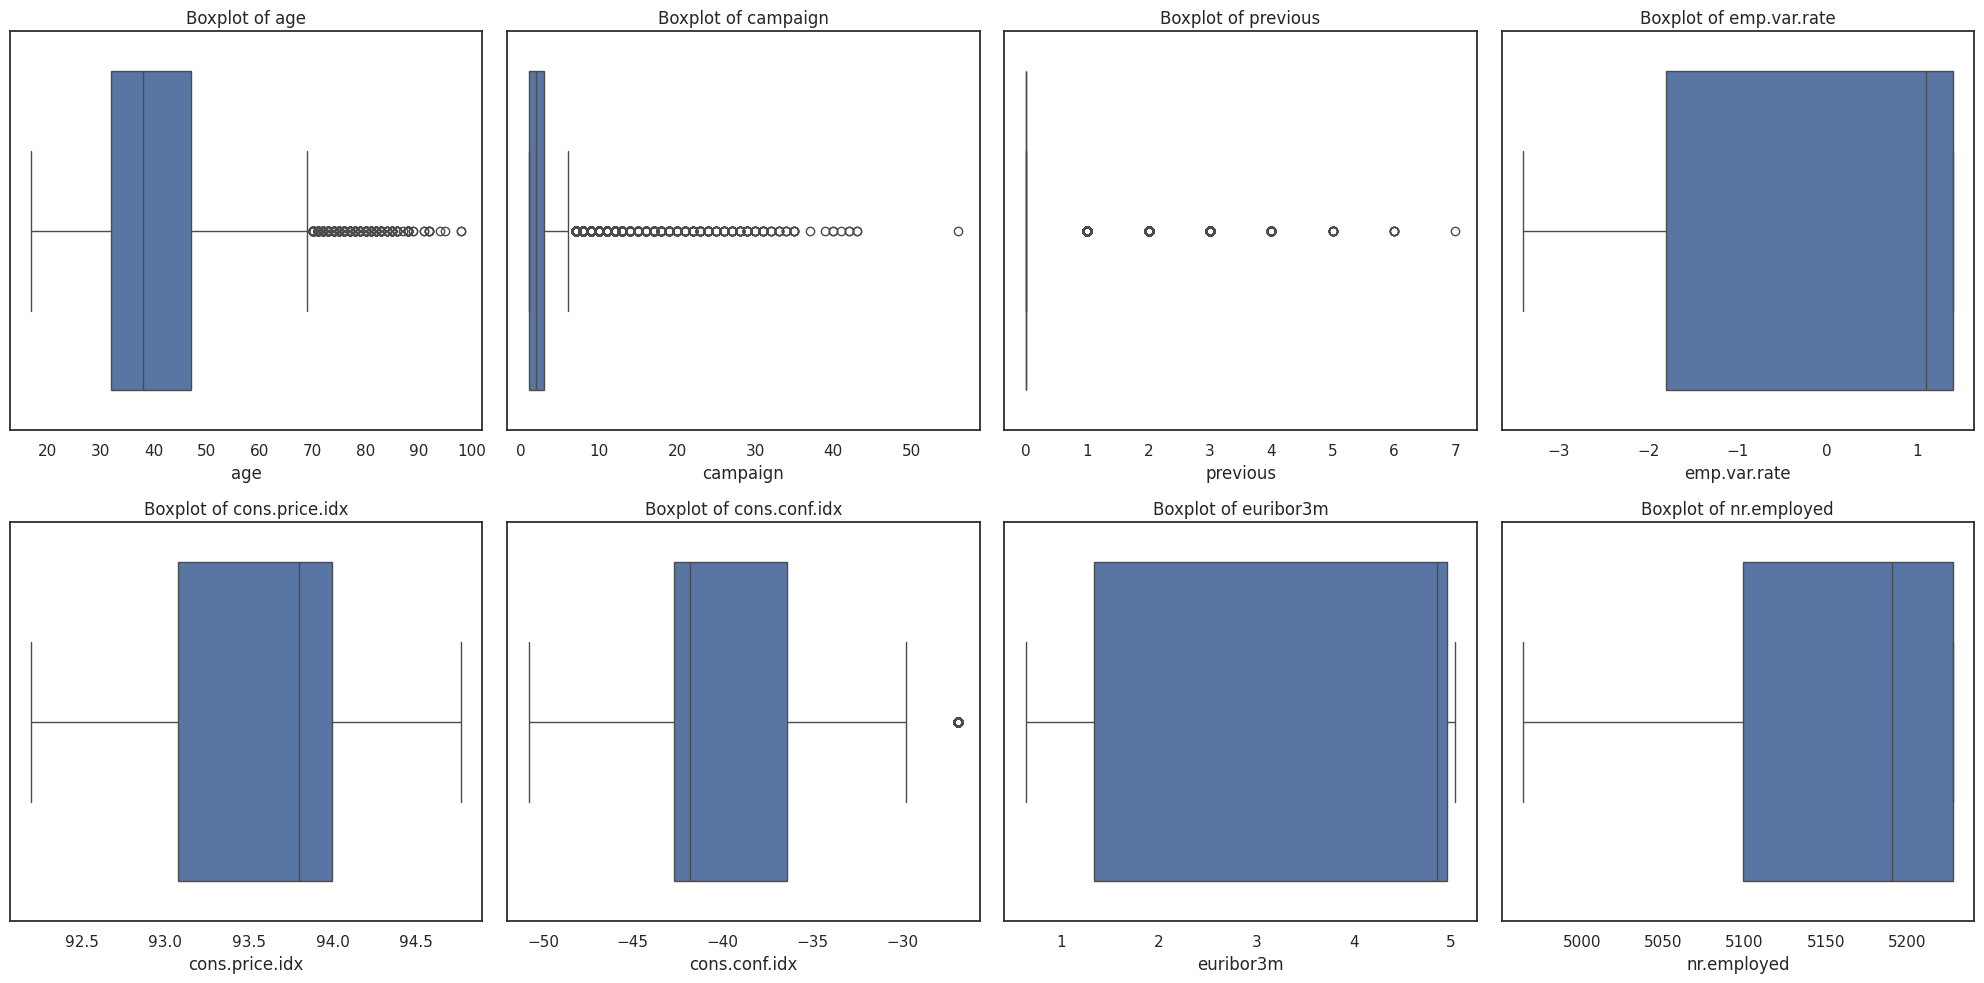

In [13]:
# Select only numerical features.
num_cols = df.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

# Iterate through numerical features and create boxplots.
for i, col in enumerate(num_cols[:-1]):
    if i < len(axes):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


As anticipated, outliers were identified in the 'campaign' and other features, as visualized through boxplots. These outliers will not be removed or replaced, as they may contain valuable information for identifying patterns in clients likely to make a deposit. Instead, a robust scaler will be applied during data preparation to handle the outliers effectively. The number and percentage of outliers detected will be presented bellow.

In [14]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100

    return col, outlier_count, outlier_percentage


In [15]:
for col in num_cols[:-1]:
    col_name, count, percentage = detect_outliers(df, col)
    if count > 0:
        print(f"Feature: {col_name}, Outlier: {count} ({percentage:.2f}%)")

Feature: age, Outlier: 458 (1.16%)
Feature: campaign, Outlier: 2398 (6.09%)
Feature: previous, Outlier: 5535 (14.05%)
Feature: cons.conf.idx, Outlier: 436 (1.11%)


#### **3.4.2. Categorical Features**

In [16]:
def analyze_categorical(df):
    """
    Analyzes categorical features.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - None. Displays the first few rows of the DataFrame and a summary table.
    """

    # Filter categorical features.
    df = df[df.select_dtypes(include='object').columns]

    # Initialize a dictionary to store summary statistics for each feature.
    summary_data = {
        'Feature': df.columns.values,
        'Type': df.dtypes.values,
        'Null': df.isna().sum().values,
        'Unique': df.nunique().values,
        'Unique Values': [df[i].unique() for i in df.columns],
    }

    # Create a DataFrame from the summary data.
    summary = pd.DataFrame(summary_data, index=range(len(df.columns)))

    # Display the first few rows of the DataFrame and the summary table.
    with pd.option_context('display.max_colwidth', None):
        display(df[:1], df.shape, summary)


In [17]:
analyze_categorical(df)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent


(39393, 10)

,Feature,Type,Null,Unique,Unique Values
0,job,object,0,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
1,marital,object,0,4,"[married, single, divorced, unknown]"
2,education,object,0,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
3,default,object,0,3,"[no, unknown, yes]"
4,housing,object,0,3,"[no, yes, unknown]"
5,loan,object,0,3,"[no, yes, unknown]"
6,contact,object,0,2,"[telephone, cellular]"
7,month,object,0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
8,day_of_week,object,0,5,"[mon, tue, wed, thu, fri]"
9,poutcome,object,0,3,"[nonexistent, failure, success]"


As previously mentioned, some categorical features contain missing values, denoted as "unknown." We will first analyze their distribution before deciding whether to handle them using appropriate imputation techniques or treat "unknown" as a separate class. From the 'contact' feature, we observe that the communication type is either 'telephone' or 'cellular.' The 'month' feature reveals that no campaigns were conducted in January or February, while the 'day_of_week' feature indicates that campaigns were only conducted on weekdays. Additionally, since most clients were not contacted in previous campaigns, we expect the majority of 'poutcome' (outcome of the previous marketing campaign) entries to be 'nonexistent.'

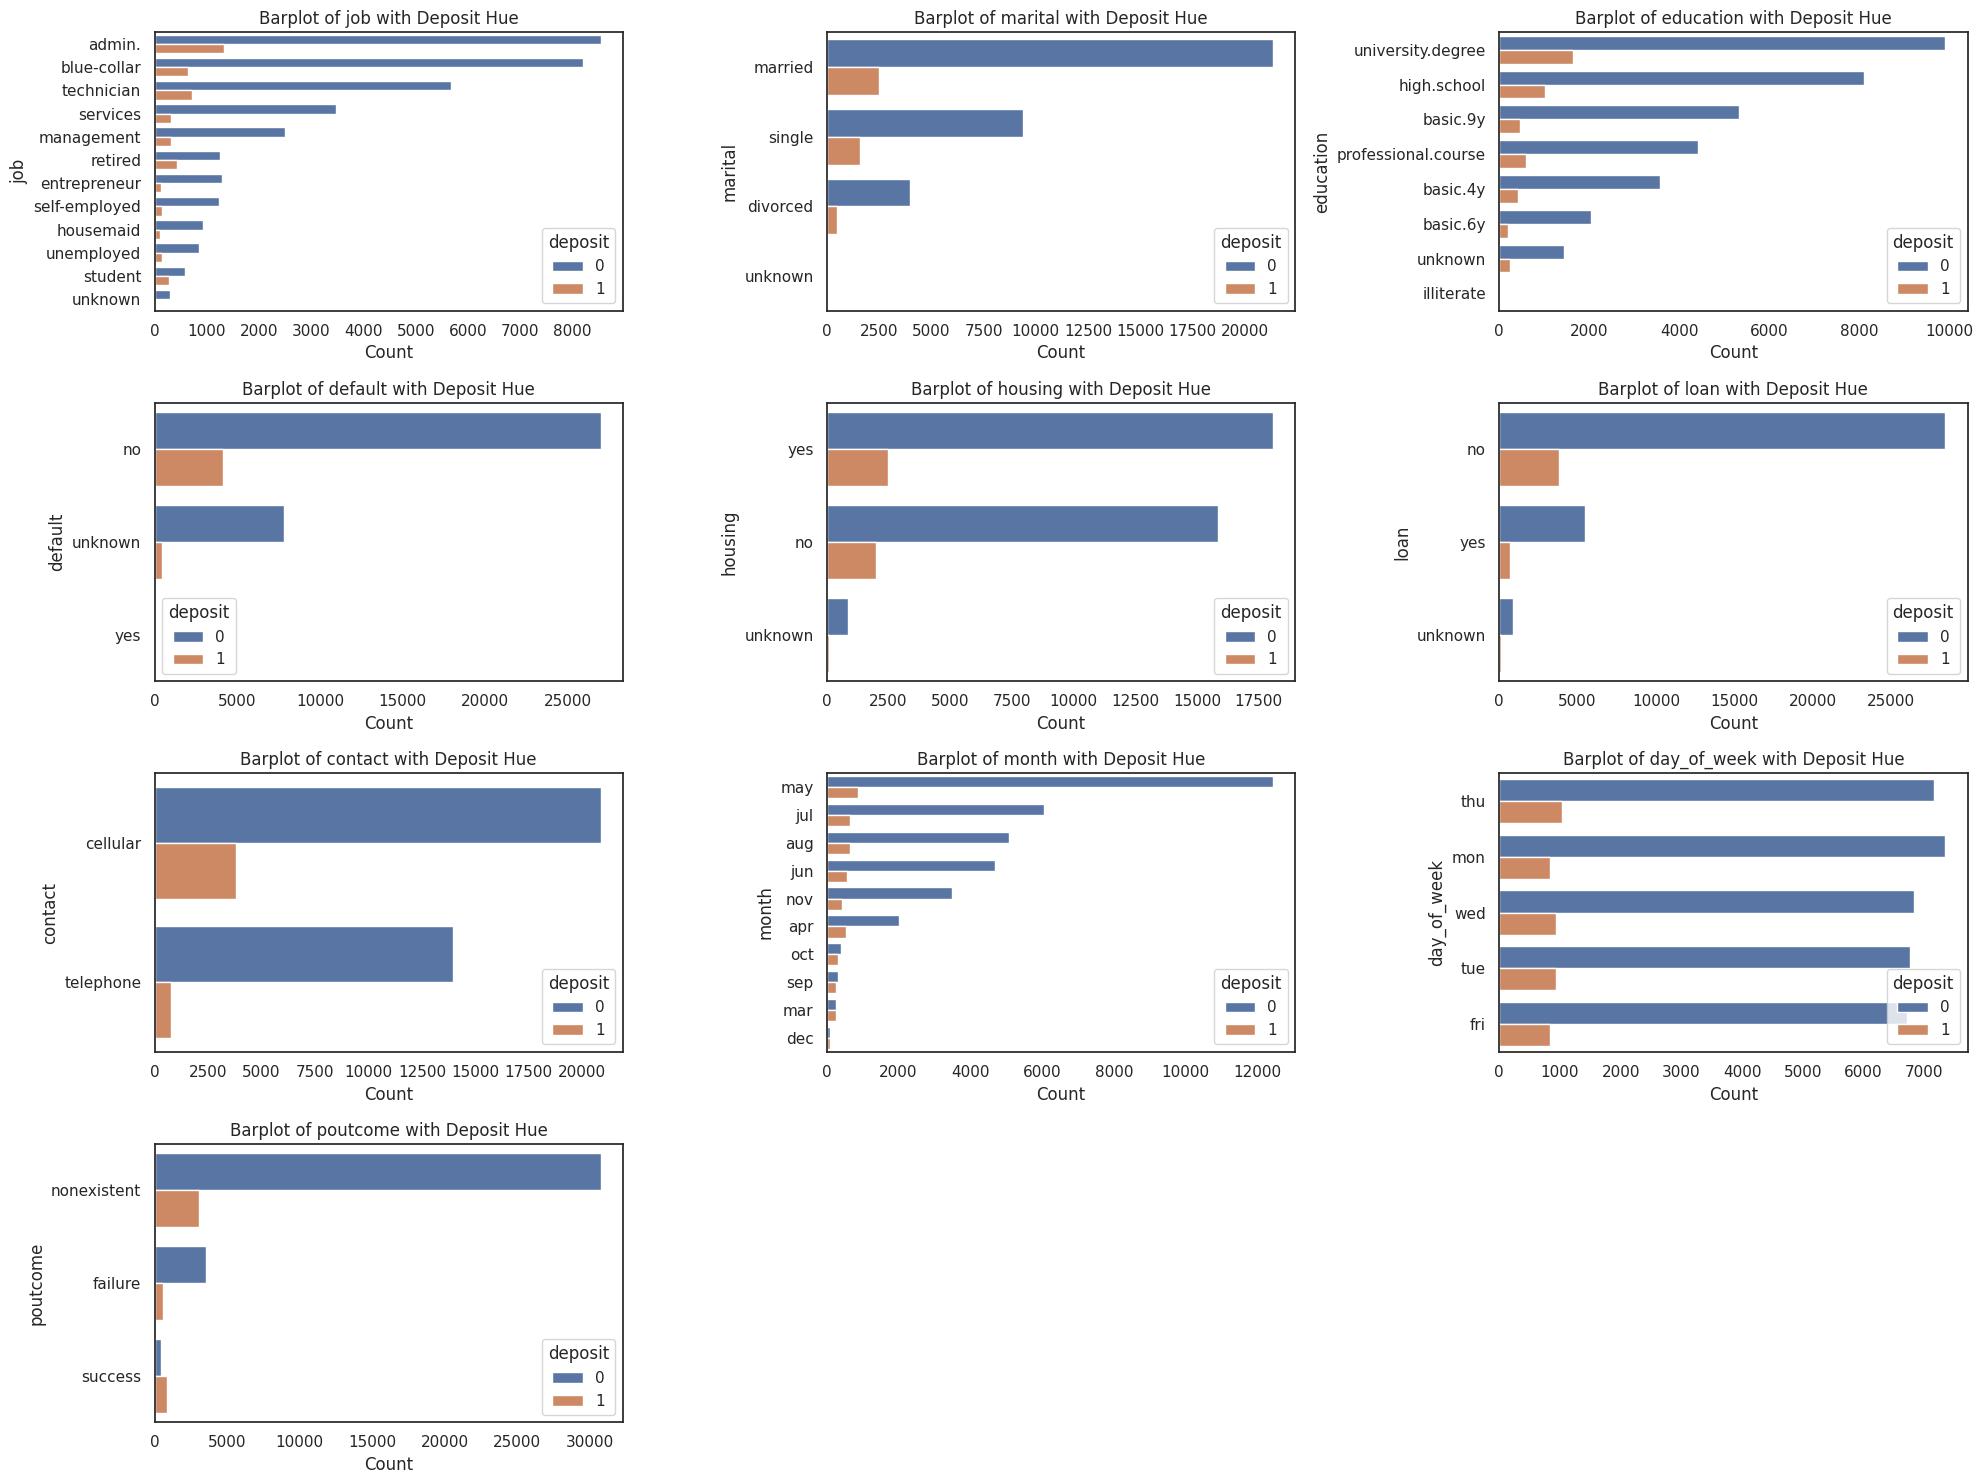

In [18]:
# Select only categorical features.
cat_cols = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.ravel()

# Iterate through categorical features and create barplots.
for i, col in enumerate(cat_cols):
    if i < len(axes):
        sns.countplot(y=col, hue='deposit', order=df[col].value_counts().index, data=df, ax=axes[i])
        axes[i].set_title(f'Barplot of {col} with Deposit Hue')
        axes[i].set_ylabel(col)
        axes[i].set_xlabel('Count')

# Hide any remaining empty subplots.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The distribution of categorical features, visualized using bar plots, reveals that some features contain a small proportion of missing values, denoted as "unknown." If the proportion of "unknown" in a feature is negligible, such as in the 'marital' feature, rows with "unknown" will be removed. Additionally, categories with very few samples, such as 'illiterate' in the 'education' feature and 'yes' in the 'default' feature, will be dropped. This approach helps reduce cardinality, particularly in feature with a high number of unique values, thereby simplifying the dataset and enhancing model performance. Those feature will be checked first before dropped.

In [19]:
def find_unknowns(df):
  unknown_counts = {}
  for col in df.columns:
    if df[col].dtype == 'object':
      unknown_count = df[col].value_counts().get('unknown', 0)
      if unknown_count > 0:
        unknown_counts[col] = unknown_count

  unknown_df = pd.DataFrame.from_dict(unknown_counts, orient='index', columns=['Unknown Count'])
  unknown_df['Percentage'] = (unknown_df['Unknown Count'] / len(df)) * 100

  return unknown_df.round(2)


In [20]:
find_unknowns(df)

,Unknown Count,Percentage
job,325,0.83
marital,78,0.20
education,1685,4.28
default,8265,20.98
housing,980,2.49
loan,980,2.49


In [21]:
df.value_counts('education')

,count
education,
university.degree,11555
high.school,9119
basic.9y,5784
professional.course,5017
basic.4y,3993
basic.6y,2222
unknown,1685
illiterate,18


In [22]:
df.value_counts('default')

,count
default,
no,31125
unknown,8265
yes,3


After analyzing all features containing "unknown" values, it was confirmed that the 'marital' feature has a very small number of "unknown" entries, with only 78 samples. Additionally, there are only 18 clients classified as 'illiterate' in the 'education' feature and 3 clients with 'yes' in the 'default' feature. Given the minimal representation of these categories, they will be removed from their respective features. However, the "unknown" category in other features will not be dropped and will instead be treated as a separate class.

In [23]:
df = df[df['marital'] != 'unknown']
df = df[df['education'] != 'illiterate']
df = df[df['default'] != 'yes']

#### **3.4.3. Features Correlation**

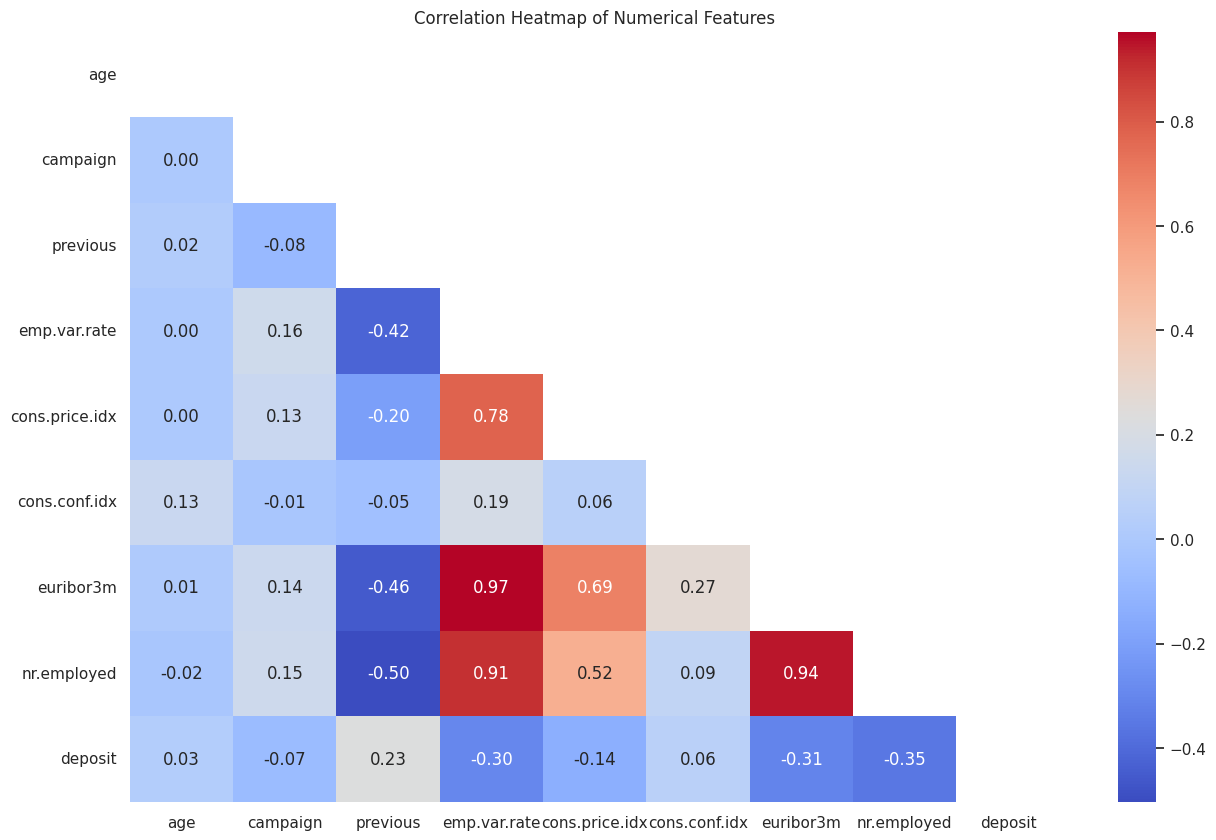

In [24]:
# Calculate features correlation.
corr_matrix = df[num_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Visualize features correlation with heatmap.
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


A heatmap analysis revealed that 'nr.employed' is highly correlated with 'emp.var.rate' and 'euribor3m,' with a correlation magnitude greater than 0.90. Among these, 'nr.employed' has the strongest correlation with the target variable, 'deposit.' Therefore, we can expect the model to perform similarly when selecting 'nr.employed' as the representative feature among the three. In contrast, features such as 'age,' 'campaign,' and 'cons.conf.idx' show little to no correlation with 'deposit.'

## **4. Data Preparation**

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### **4.1. Feature-Target Separation**  

In [26]:
# Separate features and target variable.
X = df.drop(['deposit'], axis=1)
y = df['deposit']


The dataset is split into features (`X`) and the target variable (`y`):  
- **Features (`X`)**: Represents the input variables used for training the model.  
- **Target (`y`)**: Indicates the outcome (whether a deposit was made).  

Separating features from the target variable is a critical step in machine learning for the following reasons:  
1. **Feature-Target Separation**: Enables the model to focus on learning relationships between input features and the target variable.  
2. **Data Preprocessing**: Facilitates preprocessing techniques such as scaling and encoding that are applied only to features.  
3. **Avoiding Data Leakage**: Ensures the model does not accidentally learn patterns from the target variable, which would compromise its ability to generalize to unseen data.  

This separation forms the foundation for effective data preparation and model training.  

### **4.2. Train-Test Split**  

In [27]:
# Separate train and test set.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)



The dataset is further divided into training and testing sets to evaluate the model's performance:  
- **Training Set (`X_train`, `y_train`)**: Used to train the model (80% of the data).  
- **Testing Set (`X_test`, `y_test`)**: Reserved for evaluating the model on unseen data (20% of the data).  

Parameters in the split:  
- **`test_size=0.2`**: Allocates 20% of the data to testing.  
- **`stratify=y`**: Ensures that the target variable's class distribution is consistent in both training and testing sets, reducing bias.  
- **`random_state=42`**: Provides a fixed seed for reproducibility of results.  

The following table summarizes the class distribution:  

| Set            | Total Samples | Class 1 (Deposit) | Class 0 (No Deposit) | Class 1 Proportion |  
|-----------------|---------------|-------------------|----------------------|--------------------|  
| **Training Set** | 31,435         | 3,662             | 27,773               | 11.65%             |  
| **Testing Set**  | 7,859          | 915               | 6,944                | 11.64%             |  

The distribution highlights the class imbalance in the dataset, which must be addressed during model training to ensure balanced and accurate predictions. Train-test split is essential for building and validating a robust machine learning model, preventing overfitting, and ensuring generalization to unseen data.  

### **4.3. Scale Numerical Features**  

In [28]:
# Select only numerical features.
num_cols = X_train.select_dtypes(include=np.number).columns

# Scale numerical features.
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=num_cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)


Numerical features in the dataset are scaled using the **RobustScaler**, which is designed to handle outliers effectively by scaling data based on the median and interquartile range.  

**Scaling Steps**  
1. **Selecting Numerical Features**:  
   Only columns containing numerical data are selected from the training and test sets using `select_dtypes(include=np.number)`.  

2. **Applying RobustScaler**:  
   - **`fit_transform` on Training Data**: The `fit_transform` method computes the scaling parameters (median and interquartile range) from the training data and applies the transformation.  
   - **`transform` on Test Data**: The `transform` method scales the test data using the parameters calculated from the training data, ensuring consistent scaling.  

**Scaling Purposes**  
- **Improves Model Performance**: Many machine learning algorithms, such as gradient-based models, perform better when input features are on a similar scale, preventing any feature from dominating due to its magnitude.  
- **Robust to Outliers**: By focusing on the median and interquartile range, **RobustScaler** minimizes the influence of extreme values, ensuring that the scaled data remains representative of its original distribution.  

This scaling step ensures that numerical features contribute equally to the model training process, enhancing the overall stability and reliability of the predictions.

### **4.4. Encode Categorical Features**  

In [29]:
# Select only categorical features.
cat_cols = X_train.select_dtypes(include='object').columns

# Encode categorical fetures.
encoder = OneHotEncoder(drop='first')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]).toarray(), columns=encoder.get_feature_names_out())
X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat_cols]).toarray(), columns=encoder.get_feature_names_out())


Categorical features in the dataset are encoded using the **OneHotEncoder** to convert them into a numerical format suitable for machine learning models.  

**Encoding Steps**  
1. **Selecting Categorical Features**:  
   The categorical columns are selected from the training and test datasets using `select_dtypes(include='object')`.  

2. **Applying OneHotEncoder**:  
   - **`fit_transform` on Training Data**: The `fit_transform` method learns the unique categories in the training data and then transforms these categories into binary indicators (0 or 1).  
   - **`transform` on Test Data**: The `transform` method is applied to the test data using the encoding learned from the training data, ensuring consistent representation across both datasets.  

**Encoding Purpose**  
- **Prepares for Model Input**: Machine learning algorithms require numerical input, and encoding categorical data into binary columns ensures that the data is suitable for modeling.  
- **Avoids Ordinal Relationships**: By using one-hot encoding, no artificial ordinal relationship is imposed between categories, which is especially important for nominal categorical features.  
- **Reduces Multicollinearity**: The **`drop='first'`** parameter drops the first category of each feature to prevent multicollinearity, which could distort model performance.

This encoding process ensures that categorical features are appropriately represented as numerical values, allowing the model to process them effectively without imposing any unintended relationships.

### **4.5. Combine Scaled Numerical and Encoded Categorical Features**

In [30]:
# Combined the scaled numerical features and the encoded categorical features.
X_train = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test = pd.concat([X_test_scaled, X_test_encoded], axis=1)


After scaling the numerical features and encoding the categorical ones, the next step is to combine them into a single dataset for model training and evaluation. This is done using `pd.concat`, which merges the scaled numerical features (`X_train_scaled`) and the encoded categorical features (`X_train_encoded`) horizontally (`axis=1`) for the training set, and the same operation is applied to the test set. This ensures that both the numerical and categorical features are included in a unified dataset, providing the complete set of input data for the machine learning model. Combining the features in this way guarantees consistency across both the training and test datasets, allowing the model to learn from all relevant features.

In [31]:
X_train.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown,default_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.000000,-0.5,0.0,-0.90625,-0.984766,-0.698413,-0.977116,-0.712403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.933333,0.0,0.0,0.09375,-0.385201,0.904762,0.030604,0.287597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.333333,0.0,0.0,-1.25000,-0.908596,0.158730,-0.991729,-0.889922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.533333,-0.5,0.0,0.09375,-0.385201,0.904762,0.029501,0.287597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.733333,-0.5,2.0,-1.25000,-1.737758,1.650794,-1.095396,-0.889922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## **5. Modeling**


### **5.1. Model Overview**

In [32]:
# Define a dictionary of models.
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}


A dictionary of machine learning models is defined, where each key represents the name of the model, and the value is the corresponding model object. The models included are:

1. **Logistic Regression**  
   Logistic Regression is a linear model for binary classification problems, predicting the probability of a binary outcome. It can be used to estimate the likelihood of a client subscribing to a term deposit based on demographic and campaign features.  
   - **+** Simple to implement and interpret, effective for linearly separable data.  
   - **-** Performs poorly if the relationship between features and the target is non-linear, and may be sensitive to class imbalance.

2. **Naive Bayes**  
   Naive Bayes is a probabilistic classifier based on Bayes' theorem and assumes feature independence. It is well-suited for handling categorical features like job type or marital status in the dataset.  
   - **+** Fast and computationally efficient, works well for categorical data.  
   - **-** Assumes independence between features, which might not hold for campaign-related variables in this dataset.

3. **K-Nearest Neighbors (KNN)**  
   KNN is a non-parametric model that classifies data points based on their proximity to neighbors in the feature space. It can classify subscription outcomes by considering similar client profiles.  
   - **+** Easy to understand, no assumptions about the data distribution.  
   - **-** Computationally expensive for large datasets and sensitive to the choice of k and feature scaling.

4. **Decision Tree**  
   Decision Tree builds a tree-like structure to classify outcomes based on feature splits. It can generate interpretable rules for predicting subscription outcomes using features like contact method or previous campaign results.  
   - **+** Intuitive and interpretable, handles both numerical and categorical data.  
   - **-** Prone to overfitting unless regularized, especially with imbalanced datasets.

5. **Random Forest**  
   Random Forest is an ensemble model that aggregates predictions from multiple decision trees to improve accuracy and reduce overfitting. It is effective for predicting client subscriptions by capturing complex feature interactions.  
   - **+** Robust to overfitting, handles missing data and categorical variables well.  
   - **-** Less interpretable than a single decision tree, computationally intensive with many trees.

6. **AdaBoost**  
   AdaBoost combines weak classifiers iteratively to create a strong classifier by focusing on misclassified samples. It can boost predictive performance for term deposit subscriptions by correcting previous errors.  
   - **+** Improves accuracy for moderately imbalanced data, effective in boosting weak learners.  
   - **-** Sensitive to noisy data and outliers.

7. **Gradient Boosting**  
   Gradient Boosting is a sequential model that builds trees to minimize prediction errors. It can effectively model complex, non-linear relationships in the campaign dataset.  
   - **+** High accuracy for complex problems, effective for capturing feature interactions.  
   - **-** Computationally intensive, prone to overfitting without careful tuning.

8. **XGBoost**  
   XGBoost is an optimized version of Gradient Boosting that enhances speed and performance with regularization techniques. It is ideal for this large dataset, providing efficient handling of missing values and high accuracy.  
   - **+** High performance, handles large datasets and missing data well.  
   - **-** Requires expertise in parameter tuning, computationally expensive for very large datasets.

These models will be evaluated to identify the most effective one for predicting whether a client will subscribe to a term deposit.  

### **5.2. Model Parameters**

- **`class_weight='balanced'`**  
   Applied to Logistic Regression, Decision Tree, and Random Forest to address class imbalance by weighting classes inversely proportional to their frequencies.

- **`random_state=42`**  
   Used across Decision Tree, Random Forest, AdaBoost, Gradient Boosting, and XGBoost to ensure reproducible results.

- **Default Parameters**  
   Naive Bayes assumes Gaussian distributions, and KNN uses default settings with further tuning possible for hyperparameters like `n_neighbors`.

These settings prepare the models for imbalanced data and ensure consistency in evaluation.

### **5.3. Model Benchmarking**

In [ ]:
results = []

# Split train set for cross-validation.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model's performance on recall.
for model in models.values():
    recall_scores = cross_val_score(
        model,
        X_train,
        y_train,
        scoring='recall',
        cv=skf
    )
    results.append(recall_scores.tolist())


This section evaluates the models defined in the dictionary using **StratifiedKFold** cross-validation to ensure robust performance comparison. The steps involved are:

1. **Cross-Validation Strategy**

   **StratifiedKFold** divides the training data into 5 folds (`n_splits=5`), preserving the distribution of the target classes in each fold. Shuffling is enabled (`shuffle=True`) for better fold representation, and a fixed `random_state=42` ensures reproducibility.

2. **Evaluation Metric**

   Models are assessed using **recall** as the scoring metric. Recall evaluates the model’s ability to correctly identify positive cases (clients who will subscribe to a term deposit). This is particularly important for imbalanced classification problems where the minority class (positive cases) requires focus.

3. **Model Assessment**

   Each model from the dictionary is evaluated using **cross_val_score**, which computes recall scores for all 5 folds. These scores are collected in the `results` list, with each entry containing the recall scores for one model.

This approach focuses on recall as the primary metric to address the challenge of class imbalance in the dataset, ensuring the models prioritize correctly identifying positive cases (clients who will subscribe to a term deposit). By using **StratifiedKFold** for cross-validation, each model is evaluated under consistent conditions, maintaining the target class distribution across folds. This allows for a fair comparison of performance while preserving the integrity of the dataset.  

Validating across multiple folds also enhances the reliability of the results by providing a comprehensive view of how well the models generalize to unseen data. This robust setup aligns with the business goal of accurately identifying potential term deposit subscribers, ensuring that the selected model performs effectively in real-world scenarios.  

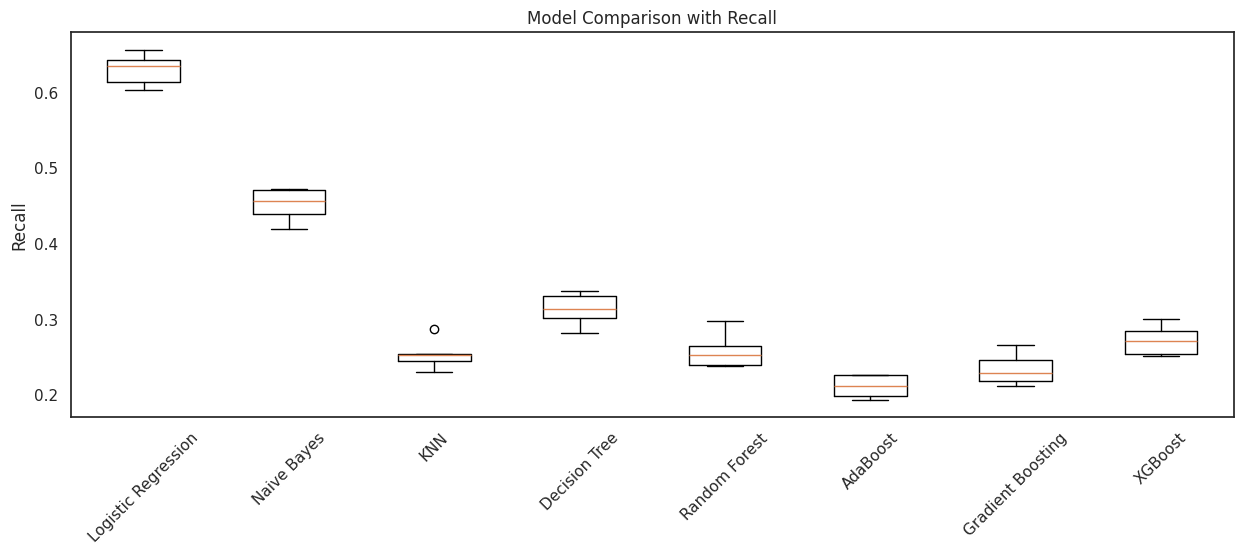

In [ ]:
# Visualize models' performance.
plt.figure(figsize=(15, 5))
plt.boxplot(results, labels=models.keys())
plt.title('Model Comparison with Recall')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()


Model Benchmarking show that **Logistic Regression** has the highest and most stable recall score compared to other models. This indicates that Logistic Regression is the best model for this task, based on recall performance.
Logistic Regression likely performs well in identifying clients who will make a deposit, which is critical for this imbalanced classification problem.

### **5.4. Logistic Regression**

**Logistic Regression** is a statistical model used for binary classification tasks, where the goal is to predict one of two possible outcomes (e.g., "yes" or "no", "deposit" or "no deposit"). It models the relationship between the dependent variable (target) and one or more independent variables (features) by estimating probabilities using a logistic function.

In the case of binary classification, the logistic function, also known as the **sigmoid function**, is used to model the probability of the positive class. The logistic regression model outputs probabilities between 0 and 1, which are then mapped to either class based on a chosen threshold (typically 0.5).

The logistic regression equation can be written as:

\begin{align}
P(y = 1 | X) = \frac{1}{1 + e^{-z}}
\end{align}

Where:
- $P(y = 1 | X)$ is the probability that the outcome is 1 (positive class).
- $z$ is the linear combination of the input features: $z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n$.
- $e$ is Euler's number (approximately 2.71828).

The goal of logistic regression is to estimate the coefficients $\beta_0, \beta_1, \dots, \beta_n$ that minimize the error between the predicted probabilities and the actual outcomes. This is typically done using **maximum likelihood estimation (MLE)**.

### **5.5. Hyperparameter Tuning**

Logistic regression has several hyperparameters that can be tuned to improve the model's performance. Hyperparameter tuning performed using **GridSearchCV** to find the best combination of hyperparameters. The hyperparameters for logistic regression are as follows:

1. **C** (Regularization Strength):
   - The inverse of regularization strength. Smaller values of C correspond to stronger regularization.
   - **Effect**: Regularization helps prevent overfitting by penalizing large coefficients. When C is small, the model places more emphasis on regularization (leading to a simpler model with fewer large weights), while larger values of C result in less regularization and a more complex model that may overfit.
   - **Tuning**: The values of C were varied in the range from 0.001 to 100 to find the optimal balance between bias and variance.

2. **Penalty** (Regularization Type):
   - Specifies the type of regularization to apply. Logistic regression supports two types:
     - `'l1'` (Lasso Regularization): L1 regularization encourages sparsity in the coefficients (some coefficients may be driven to zero).
     - `'l2'` (Ridge Regularization): L2 regularization penalizes the sum of squared coefficients but does not drive any coefficients exactly to zero.
   - **Effect**: L1 regularization can be used for feature selection, as it can set some coefficients to zero. L2 regularization tends to shrink the coefficients towards zero but does not eliminate them completely.
   - **Tuning**: Both `'l1'` and `'l2'` were tested to determine which regularization type worked best for the dataset.

3. **Solver** (Optimization Algorithm):
   - Specifies the optimization algorithm used to find the coefficients. Logistic regression supports several solvers, but two were considered:
     - `'liblinear'`: A solver that is efficient for small datasets and works well with both L1 and L2 regularization.
     - `'saga'`: A solver that is more scalable and works well for larger datasets, particularly when using L1 regularization.
   - **Effect**: The solver determines how the model's coefficients are optimized during training. The choice of solver can impact both the model's performance and training speed.
   - **Tuning**: Both `'liblinear'` and `'saga'` were tested to compare their performance and efficiency.

In [37]:
# Define the parameter grid for Logistic Regression.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression model.
lr = LogisticRegression(class_weight='balanced', random_state=42)

# Create a GridSearchCV object.
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='recall',
    cv=skf,
    n_jobs=-1
)


# Fit the GridSearchCV object to the training data.
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding recall score.
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation recall score: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set.
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)
test_recall = recall_score(y_test, y_pred)
print(f"Test set recall score: {test_recall:.4f}")


Best hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation recall score: 0.7089
Test set recall score: 0.7169


**Hyperparameter tuning** is performed using **GridSearchCV** to optimize the Logistic Regression model for the recall metric.

1. **Define the Parameter Grid**
   - A dictionary `param_grid` is created to define the hyperparameters to be tuned.

2. **Create a Logistic Regression Model**
   - A Logistic Regression model is initialized with `class_weight='balanced'` to handle class imbalance, and `random_state=42` for reproducibility.

3. **GridSearchCV**
   - `GridSearchCV` is created with the following parameters:
     - **estimator=lr**: The Logistic Regression model.
     - **param_grid=param_grid**: The parameter grid to search over.
     - **scoring=recall_scorer**: The scoring metric, which is recall, to evaluate the performance of different hyperparameter combinations.
     - **cv=skf**: Stratified K-fold cross-validation to ensure a balanced split of the target variable.
     - **n_jobs=-1**: Uses all available CPU cores to speed up the search.

4. **Fit GridSearchCV**
   - The `fit` method is called to search over the hyperparameter grid and find the best combination based on recall score.
   
6. **Evaluate the Best Model on the Test Set**
   - The best model found through GridSearchCV (`best_lr`) is used to predict the target values for the test set.

**Output Interpretation**
- **Best hyperparameters**: `{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}`: The best combination of hyperparameters for optimizing recall.
- **Best cross-validation recall score**: `0.7089`: The recall score achieved during cross-validation on the training set.
- **Test set recall score**: `0.7169`: The recall score on the unseen test set, showing that the model generalizes well to new data.

The hyperparameter tuning process has improved the Logistic Regression model, achieving a recall score of 0.7169 on the test set. This demonstrates that the model is effective in identifying clients who will make a deposit while handling class imbalance appropriately.

## **6. Evaluation**

### **6.1. Recall**

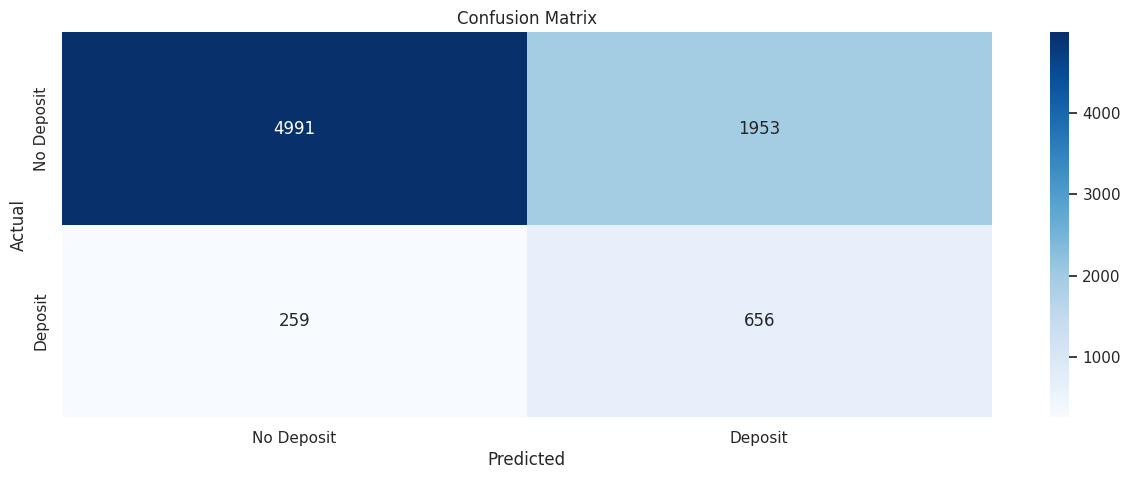

In [38]:
# Visualize confusion matrix.
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Deposit', 'Deposit'], yticklabels=['No Deposit', 'Deposit'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Recall** is choose as the evaluation metric for the classification model for predicting clients who are likely to make a deposit. Recall is particularly important in cases of imbalanced classes, as it focuses on the model's ability to correctly identify positive instances (in this case, clients who will deposit). This is crucial because failing to identify these clients can have significant consequences in business decisions.

Recall, also known as **sensitivity** or **true positive rate**, measures the proportion of actual positive instances (clients who will deposit) that are correctly identified by the model. It is calculated using the following formula:

\begin{align}
\text{Recall} = \frac{TP}{TP + FN}
\end{align}

Where:
- **TP (True Positives)**: The number of correctly predicted positive cases (clients predicted to deposit who actually will).
- **FN (False Negatives)**: The number of actual positive cases that were incorrectly predicted as negative (clients who will deposit but were predicted not to).

**Recall** was chosen as the key metric because we want to maximize the number of clients who are identified as potential depositors. By maximizing recall, we reduce the risk of missing out on these important clients, which is critical in financial contexts.

The confusion matrix provides a detailed view of the model's performance:

- **True Positives (TP)**: 656 — These are the clients correctly predicted as making a deposit.
- **True Negatives (TN)**: 4991 — These are the clients correctly predicted as not making a deposit.
- **False Positives (FP)**: 1953 — These are the clients incorrectly predicted as making a deposit when they will not.
- **False Negatives (FN)**: 259 — These are the clients incorrectly predicted as not making a deposit when they actually will.

From the confusion matrix, we can calculate the **recall** as:

\begin{align}
\text{Recall} = \frac{656}{656 + 259} = \frac{656}{915} \approx 0.7169
\end{align}

This indicates that the model correctly identified 71.69% of the clients who will deposit.

### **6.2. Business Metrics**

To evaluate the business impact of using the model versus not using the model, we'll calculate **cost savings** and **revenue gains** based on the recall metric.

#### **1. Recall Calculation**

- **Without Model**

    Since all 915 positive clients (clients who will deposit) are identified as True Positives (TP) and no False Negatives (FN) are present, the recall without the model is:

\begin{align}
\text{Recall without model} = \frac{915}{915 + 0} = 1.0
\end{align}

- **With Model**

    The recall with the model is $0.7169$ as calculated before.

#### **2. Cost Savings**

- **Without the Model**

    The telemarketing campaign would make calls to all 7859 clients. The cost per call is €5, so the total cost of calling all clients is:

\begin{align}
\text{Total cost without model} = 7859 \times 5 = €39,295
\end{align}

- **With the Model**

    The calls are more targeted. Only clients predicted to make a deposit (TP + FP) are called. Therefore, the number of calls made would be:

\begin{align}
\text{Number of calls with model} = 656 (\text{TP}) + 1953 (\text{FP}) = 2609
\end{align}

- The cost for calling these 2609 clients is:

\begin{align}
\text{Total cost with model} = 2609 \times 5 = €13,045
\end{align}

- Thus, the **cost savings** due to using the model is:

\begin{align}
\text{Cost savings} = €39,295 - €13,045 = €26,250
\end{align}

#### **3. Revenue Gains**

Each successful deposit is worth €62.50 annually. The total revenue from successful deposits can be calculated as:

- **Without Model**

    Since all 915 positive clients are contacted, the revenue generated from successful deposits is:

\begin{align}
\text{Revenue without model} = 915 \times 62.5 = €57,187.50
\end{align}

- **With Model**

    The model identifies 656 True Positives who are predicted to make a deposit. Therefore, the revenue generated with the model is:

\begin{align}
\text{Revenue with model} = 656 \times 62.5 = €41,000
\end{align}

- Thus, the **revenue gain** is:

\begin{align}
\text{Revenue gain} = €41,000 - €57,187.50 = -€16,187.50
\end{align}

#### **4. Total Business Impact**

- **Cost Savings**: €26,250 (from reducing the number of calls made)
- **Revenue Gain**: -€16,187.50 (due to fewer positive clients being identified by the model)

#### **5. Conclusion**

- **Using the Model** saves **€26,250** in telemarketing costs.
- **However**, the model results in a **revenue loss** of **€16,187.50** due to fewer positive clients being identified (due to False Negatives).
- The **net business impact** is:

\begin{align}
\text{Net Impact} = €26,250 - €16,187.50 = €10,062.50
\end{align}

Thus, while the model results in a loss of revenue from missed deposits, it still provides a net **positive business impact** of **€10,062.50** due to significant cost savings.

### **6.3. Feature Importance Analysis**


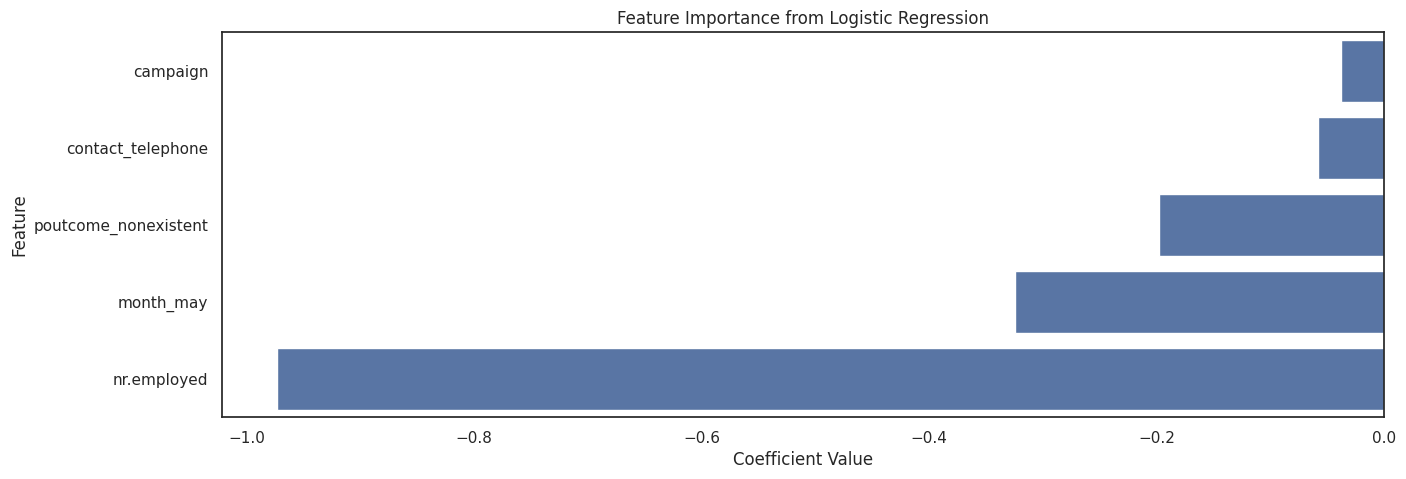

In [39]:
# Get feature importances from the trained Logistic Regression model
feature_importances = best_lr.coef_[0]

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(15, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[feature_importance_df['Importance'] != 0])
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [40]:
feature_importance_df[feature_importance_df['Importance'] != 0].round(3)

,Feature,Importance
1,campaign,-0.038
32,contact_telephone,-0.058
46,poutcome_nonexistent,-0.198
38,month_may,-0.325
7,nr.employed,-0.973


The feature importance analysis allows us to determine which factors have the most significant impact on customer conversions, particularly on whether a customer will make a deposit or not. By evaluating the coefficients of the trained Logistic Regression model, we can assess how each feature influences the outcome.

The **importance** of a feature is represented by the coefficient of the feature in the logistic regression model. Positive coefficients indicate that the feature has a positive influence on the likelihood of a customer making a deposit, while negative coefficients indicate the opposite.

The findings based on the feature importance analysis are:

1. **`nr.employed`**: This feature has the most negative importance (-0.973), indicating that the number of employees in the company is strongly associated with a decreased likelihood of conversion. A higher value in `nr.employed` likely suggests a lower chance of making a deposit, suggesting that this factor could be linked to economic conditions or market trends.

2. **`month_may`**: The coefficient for this feature is also negative (-0.324), suggesting that customers contacted in May are less likely to make a deposit. This could reflect seasonal trends in customer behavior or campaign effectiveness during this particular month.

3. **`poutcome_nonexistent`**: This feature shows a negative importance (-0.198), which suggests that if there was no prior outcome from previous campaigns, customers are less likely to deposit. This highlights the importance of prior interactions in influencing customer decisions.

4. **`contact_telephone`**: A negative importance (-0.058) for this feature implies that customers who were contacted by telephone are slightly less likely to make a deposit compared to other methods. This might indicate the method of communication could influence customer engagement.

5. **`campaign`**: The `campaign` feature, which represents the number of contacts performed during the current campaign, also has a negative impact on the likelihood of a deposit (-0.038). This could suggest that after a certain threshold of contact attempts, customers are less likely to respond positively.

### **6.4. Insights**

- Features such as `nr.employed`, `month_may`, and `poutcome_nonexistent` significantly reduce the likelihood of customer deposits, while features like `contact_telephone` and `campaign` show moderate effects.
- The negative coefficients suggest areas where improvements or targeted strategies could help boost customer conversion, such as refining how customers are contacted and optimizing timing based on past outcomes.

This analysis helps identify critical variables that influence customer behavior, providing valuable insights for optimizing telemarketing strategies and increasing deposit conversions.

## **7. References**

[1] Moro, S., Cortez, P., & Rita, P. 2014. A data-driven approach to predict the success of bank telemarketing. Decis. Support Syst., 62, 22-31. https://repositorium.sdum.uminho.pt/bitstream/1822/30994/1/dss-v3.pdf

[2] maestroqa. 2023. https://www.maestroqa.com/blog/call-center-cost-per-call

[3] Banco Montepio. 2024. https://www.bancomontepio.pt/en/individuals/savings-and-retirement/term-deposits

[4] the Global Economi. 2021. https://www.theglobaleconomy.com/Portugal/net_interest_margin/

[5] kaggle. 2014. https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset
